In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math
import math as m
import random as rnd
from pathlib import Path
import os
from moviepy.editor import VideoFileClip
from IPython.display import HTML
%matplotlib inline


In [22]:

def get_object_points(img):
    nx = 9
    ny = 6
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#     plt.imshow(gray, cmap='gray')
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None) 
    if ret:
        objp = np.zeros((nx*ny,3), np.float32)
        objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)
        return True,objp,corners
    else:
        return False,[], []


# def cal_undistort(img,objp,imgp):    
# #     print()
# #     src = np.float32(np.swapaxes(corners, 1, 0)[0][np.r_[0:2,nx:nx+2]])
# #     dst = np.float32(np.int32(src/ 100)*100)

#     ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objp, imgp, img.shape,None,None)    
#     return cv2.undistort(img, mtx, dist, None)


In [20]:
def clalibrate_camera(imgs):
    object_points = []
    image_points = []
    for img in imgs:
        ret ,objp,imgp = get_object_points(img)
        if(ret):
            object_points.append(objp)
            image_points.append(imgp)

    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(object_points, image_points, img.shape[:2],None,None) 
    return mtx, dist, rvecs, tvecs
    
        

In [32]:
calibration_images = [cv2.imread('camera_cal/'+img) for img in os.listdir("camera_cal/")]
mtx, dist, rvecs, tvecs = clalibrate_camera(calibration_images)

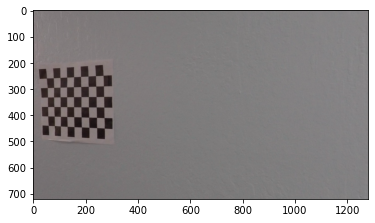

In [30]:
  plt.imshow(cv2.undistort(calibration_images[2], mtx, dist, None))

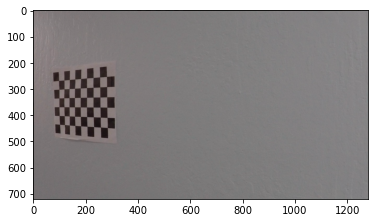

In [31]:
plt.imshow(cv2.imread('camera_cal/' + os.listdir('camera_cal/')[2]))